In [1]:
# Shanarri indicators: considering these in relation to Positive Destinations.
# Those whose wellbeing has decreased - considering factors why.
# Extent YP feels safe, healthy, nurtured, achieving, active, included, respected and confident.
# Data points: First Continuous Support form and Destination Achieved form. 
# Dataset: only New Engagements since April 08. 
# Considering only those who have: a new enagegement form, a continuous support form, and destination achieved form.
# Import packages and dataset
# Suppress the warning for chained assignment
import pandas as pd
OFN = pd.read_csv('OFN.csv', encoding='latin-1')
pd.set_option('mode.chained_assignment', None)

In [2]:
# Remove all forms except Destination Achieved, New Engagement and Continuous Support forms. 
# Filter rows based on Record Type
desired_record_types = ['Destination Achieved', 'Continuous Support', 'New Engagement']
filtered_df = OFN[OFN['Record Type'].isin(desired_record_types)]

In [3]:
# Create three data frames based on Record Types. 
destination_achieved = OFN[OFN['Record Type'] == 'Destination Achieved']
continuous_support = OFN[OFN['Record Type'] == 'Continuous Support']
new_engagement = OFN[OFN['Record Type'] == 'New Engagement']

In [4]:
# Keep only the first Continuous Support form submitted based on Created Date
continuous_support = continuous_support.sort_values(by='Created Date').groupby('Full Name').head(1)

In [5]:
# Concat the results so all forms are combined into one data frame. 
result_df = pd.concat([destination_achieved, continuous_support, new_engagement])

In [6]:
# We now need to keep only Full Names with a New Engagement, Continuous Support and Destination Achieved form. 

# Identify Full Names with forms in Continuous Support, Destination Achieved, and New Engagement
full_names_with_all_forms = set(continuous_support['Full Name']).intersection(
    set(destination_achieved['Full Name']),
    set(new_engagement['Full Name'])
 )


# Filter the original DataFrame based on Full Names with both forms
filtered_df = result_df[result_df['Full Name'].isin(full_names_with_all_forms)]

In [7]:
# Sort the DataFrame by 'Full Names', 'Record Type', and 'Created Date'
filtered_df = filtered_df.sort_values(by=['Full Name', 'Record Type', 'Created Date'])

In [8]:
# Save the result to a new CSV file or update the existing one
filtered_df.to_csv('result_OFN_filtered.csv', index=False)

In [9]:
# Create columns for new variables and map changes

# Create a new column 'Change in Extent YP feels wellbeing/happiness'
filtered_df['Change in General wellbeing/happiness rating'] = filtered_df.groupby('Full Name')['General wellbeing/happiness rating'].diff()

# Map the changes to 'Increased', 'Decreased', or 'No Change'
filtered_df['Change in General wellbeing/happiness rating'] = filtered_df['Change in General wellbeing/happiness rating'].apply(
    lambda x: 'Increased' if x > 0 else ('Decreased' if x < 0 else 'No Change')
)


# Create a new column 'Change in Extent YP feels healthy'
filtered_df['Change in Extent YP feels healthy'] = filtered_df.groupby('Full Name')['Extent YP feels healthy'].diff()

# Map the changes to 'Increased', 'Decreased', or 'No Change'
filtered_df['Change in Extent YP feels healthy'] = filtered_df['Change in Extent YP feels healthy'].apply(
    lambda x: 'Increased' if x > 0 else ('Decreased' if x < 0 else 'No Change')
)

# Create a new column 'Change in Extent YP feels safe'
filtered_df['Change in Extent YP feels safe'] = filtered_df.groupby('Full Name')['Extent YP feels safe'].diff()

# Map the changes to 'Increased', 'Decreased', or 'No Change'
filtered_df['Change in Extent YP feels safe'] = filtered_df['Change in Extent YP feels safe'].apply(
    lambda x: 'Increased' if x > 0 else ('Decreased' if x < 0 else 'No Change')
)

# Create a new column 'Change in Extent YP feels they are achieving'
filtered_df['Change in Extent YP feels they are achieving'] = filtered_df.groupby('Full Name')['Extent YP feels they are achieving'].diff()

# Map the changes to 'Increased', 'Decreased', or 'No Change'
filtered_df['Change in Extent YP feels they are achieving'] = filtered_df['Change in Extent YP feels they are achieving'].apply(
    lambda x: 'Increased' if x > 0 else ('Decreased' if x < 0 else 'No Change')
)


# Create a new column 'Change in Extent YP feels active'
filtered_df['Change in Extent YP feels active'] = filtered_df.groupby('Full Name')['Extent YP feels active'].diff()

# Map the changes to 'Increased', 'Decreased', or 'No Change'
filtered_df['Change in Extent YP feels active'] = filtered_df['Change in Extent YP feels active'].apply(
    lambda x: 'Increased' if x > 0 else ('Decreased' if x < 0 else 'No Change')
)

# Create a new column 'Change in Extent YP feels they are active'
filtered_df['Change in Extent YP feels included'] = filtered_df.groupby('Full Name')['Extent YP feels included'].diff()

# Map the changes to 'Increased', 'Decreased', or 'No Change'
filtered_df['Change in Extent YP feels included'] = filtered_df['Change in Extent YP feels included'].apply(
    lambda x: 'Increased' if x > 0 else ('Decreased' if x < 0 else 'No Change')
)

# Create a new column 'Change in Extent YP feels they are respected'
filtered_df['Change in Extent YP feels respected'] = filtered_df.groupby('Full Name')['Extent YP feels respected'].diff()

# Map the changes to 'Increased', 'Decreased', or 'No Change'
filtered_df['Change in Extent YP feels respected'] = filtered_df['Change in Extent YP feels respected'].apply(
    lambda x: 'Increased' if x > 0 else ('Decreased' if x < 0 else 'No Change')
)

# Create a new column 'Change in Extent YP feels they are responsible'
filtered_df['Change in Extent YP feels responsible'] = filtered_df.groupby('Full Name')['Extent YP feels responsible'].diff()

# Map the changes to 'Increased', 'Decreased', or 'No Change'
filtered_df['Change in Extent YP feels responsible'] = filtered_df['Change in Extent YP feels responsible'].apply(
    lambda x: 'Increased' if x > 0 else ('Decreased' if x < 0 else 'No Change')
)

# Create a new column 'Change in Extent YP feels nurtured'
filtered_df['Change in Extent YP feels nurtured'] = filtered_df.groupby('Full Name')['Extent YP feels nurtured'].diff()

# Map the changes to 'Increased', 'Decreased', or 'No Change'
filtered_df['Change in Extent YP feels nurtured'] = filtered_df['Change in Extent YP feels nurtured'].apply(
    lambda x: 'Increased' if x > 0 else ('Decreased' if x < 0 else 'No Change')
)

# Save the result to a new CSV file or update the existing one
filtered_df.to_csv('result_OFN_filtered_with_change.csv', index=False)

In [10]:
# Create a new DataFrame with only 'Destination Achieved' rows
destination_achieved_df = filtered_df[filtered_df['Record Type'] == 'Destination Achieved']

In [11]:
# Get the count of 'Change in General Wellbeing'
extent_yp_count_wellbeing = destination_achieved_df['Change in General wellbeing/happiness rating'].value_counts()

print(extent_yp_count_wellbeing)

# Save the result to a new CSV file or update the existing one
destination_achieved_df.to_csv('result_destination_achieved.csv', index=False)

Increased    272
No Change    174
Decreased     54
Name: Change in General wellbeing/happiness rating, dtype: int64


In [12]:
# Get the count of 'Change in Extent YP feels nurtured'
extent_yp_count_nurtured = destination_achieved_df['Change in Extent YP feels nurtured'].value_counts()

print(extent_yp_count_nurtured)

# Save the result to a new CSV file or update the existing one
destination_achieved_df.to_csv('result_destination_achieved.csv', index=False)

Increased    263
No Change    167
Decreased     70
Name: Change in Extent YP feels nurtured, dtype: int64


In [13]:
# Get the count of 'Extent YP increase wellbeing/happiness'
extent_yp_count_wellbeing = destination_achieved_df['Change in General wellbeing/happiness rating'].value_counts()

print(extent_yp_count_wellbeing)

# Save the result to a new CSV file or update the existing one
destination_achieved_df.to_csv('result_destination_achieved.csv', index=False)

Increased    272
No Change    174
Decreased     54
Name: Change in General wellbeing/happiness rating, dtype: int64


In [14]:
# Get the count of 'Extent YP feels healthy'
extent_yp_count_healthy = destination_achieved_df['Change in Extent YP feels healthy'].value_counts()

print(extent_yp_count_healthy)

# Save the result to a new CSV file or update the existing one
destination_achieved_df.to_csv('result_destination_achieved.csv', index=False)

Increased    268
No Change    167
Decreased     65
Name: Change in Extent YP feels healthy, dtype: int64


In [15]:
# Get the count of 'Extent YP feels safe'
extent_yp_count_safe = destination_achieved_df['Change in Extent YP feels safe'].value_counts()

print(extent_yp_count_safe)

# Save the result to a new CSV file or update the existing one
destination_achieved_df.to_csv('result_destination_achieved.csv', index=False)

Increased    241
No Change    182
Decreased     77
Name: Change in Extent YP feels safe, dtype: int64


In [16]:
# Get the count of 'Extent YP feels they are achieving'
extent_yp_count_achieving = destination_achieved_df['Change in Extent YP feels they are achieving'].value_counts()

print(extent_yp_count_achieving)

# Save the result to a new CSV file or update the existing one
destination_achieved_df.to_csv('result_destination_achieved.csv', index=False)

Increased    309
No Change    134
Decreased     57
Name: Change in Extent YP feels they are achieving, dtype: int64


In [17]:
# Get the count of 'Extent YP feels active'
extent_yp_count_active = destination_achieved_df['Change in Extent YP feels active'].value_counts()

print(extent_yp_count_active)

# Save the result to a new CSV file or update the existing one
destination_achieved_df.to_csv('result_destination_achieved.csv', index=False)

Increased    262
No Change    166
Decreased     72
Name: Change in Extent YP feels active, dtype: int64


In [18]:
# Get the count of 'Extent YP feels included'
extent_yp_count_included = destination_achieved_df['Change in Extent YP feels included'].value_counts()

print(extent_yp_count_included)

# Save the result to a new CSV file or update the existing one
destination_achieved_df.to_csv('result_destination_achieved.csv', index=False)

Increased    265
No Change    177
Decreased     58
Name: Change in Extent YP feels included, dtype: int64


In [19]:
# Get the count of 'Extent YP feels respected'
extent_yp_count_respected = destination_achieved_df['Change in Extent YP feels respected'].value_counts()

print(extent_yp_count_respected)

# Save the result to a new CSV file or update the existing one
destination_achieved_df.to_csv('result_destination_achieved.csv', index=False)

Increased    266
No Change    167
Decreased     67
Name: Change in Extent YP feels respected, dtype: int64


In [20]:
# Get the count of 'Extent YP feels responsible'
extent_yp_count_responsible = destination_achieved_df['Change in Extent YP feels responsible'].value_counts()

print(extent_yp_count_responsible)

# Save the result to a new CSV file or update the existing one
destination_achieved_df.to_csv('result_destination_achieved.csv', index=False)

Increased    267
No Change    163
Decreased     70
Name: Change in Extent YP feels responsible, dtype: int64


In [21]:
# Create a DataFrame with the counts
counts_df = pd.DataFrame({
    'Change in Shanarri': ['Increased', 'No Change', 'Decreased'],
    'Extent YP feels wellbeing': extent_yp_count_wellbeing,
    'Extent YP feels healthy': extent_yp_count_healthy,
    'Extent YP feels they are achieving': extent_yp_count_achieving,
    'Extent YP feels responsible': extent_yp_count_responsible,
    'Extent YP feels safe': extent_yp_count_safe,
    'Extent YP feels nurtured': extent_yp_count_nurtured,
    'Extent YP feels respected': extent_yp_count_respected,
    'Extent YP feels included': extent_yp_count_included,
    'Extent YP feels active': extent_yp_count_active
})

# Display the resulting DataFrame
print(counts_df)

          Change in Shanarri  Extent YP feels wellbeing  \
Increased          Increased                        272   
No Change          No Change                        174   
Decreased          Decreased                         54   

           Extent YP feels healthy  Extent YP feels they are achieving  \
Increased                      268                                 309   
No Change                      167                                 134   
Decreased                       65                                  57   

           Extent YP feels responsible  Extent YP feels safe  \
Increased                          267                   241   
No Change                          163                   182   
Decreased                           70                    77   

           Extent YP feels nurtured  Extent YP feels respected  \
Increased                       263                        266   
No Change                       167                        167   
Decreased  

In [22]:
# Export DataFrame to Excel
excel_file_path = 'Changes_in_Shannari2.xlsx'
counts_df.to_excel(excel_file_path, index=False)


In [23]:
# Remove white spaces from the "Barriers" column
destination_achieved_df['Barriers.1'] = destination_achieved_df['Barriers.1'].str.replace(' ', '')

# Create a set to store unique barrier values
unique_barriers = set()

# Iterate over each row in the "Barriers" column
for row in destination_achieved_df['Barriers.1'].dropna():
    # Split the values in the current row by semicolon
    row_values = row.split(';')
    
    # Add each unique value to the set
    unique_barriers.update(row_values)

# Create new columns based on the unique barrier values
for barrier in unique_barriers:
    destination_achieved_df[barrier] = destination_achieved_df['Barriers.1'].apply(lambda x: 1 if isinstance(x, str) and barrier in x.split(';') else 0)

In [24]:
# Create 'barriers_all' column

# List of columns to iterate through
columns_to_count = [
    'MentalHealthChallenges', 'Refugeeorasylumseeker', 'Homeless',
    'LookedafterYP/CareExperienced', 'Criminalconviction',
    'Physicalhealthissues/disability', 'Transportationissues', 'FamilyIssues',
    'Carer', 'AddictionIssues', 'Literacy/Numeracyissues', 'Learningchallenges'
]

# Create 'barriers_all' column and initialize it to 0
destination_achieved_df['barriers_all'] = 0

# Iterate over the columns and sum them into 'barriers_all'
for column in columns_to_count:
    destination_achieved_df['barriers_all'] += destination_achieved_df[column]

In [25]:
# Group by 'Change in Extent YP feels healthy' and calculate the average of 'barriers_all'
average_barriers = destination_achieved_df.groupby('Change in General wellbeing/happiness rating')['barriers_all'].mean()

# Display the result
print(average_barriers)

Change in General wellbeing/happiness rating
Decreased    1.259259
Increased    1.812500
No Change    1.252874
Name: barriers_all, dtype: float64


In [26]:
# Display the value counts of 'barriers_all'
barriers_all_counts = destination_achieved_df['barriers_all'].value_counts()

# Display the result
print(barriers_all_counts)

1    173
2    141
0     96
3     50
4     30
5      7
6      2
7      1
Name: barriers_all, dtype: int64


In [27]:
# Group by 'Change in General wellbeing/happiness rating' and 'Who sourced the job opportunity'
grouped_df = destination_achieved_df.groupby(['Change in General wellbeing/happiness rating', 'Who sourced the job opportunity?']).size().unstack(fill_value=0)

# Display the resulting DataFrame
print(grouped_df)

Who sourced the job opportunity?              Other  Venture  Young person
Change in General wellbeing/happiness rating                              
Decreased                                         6       24            24
Increased                                        48      137            87
No Change                                        20       69            85


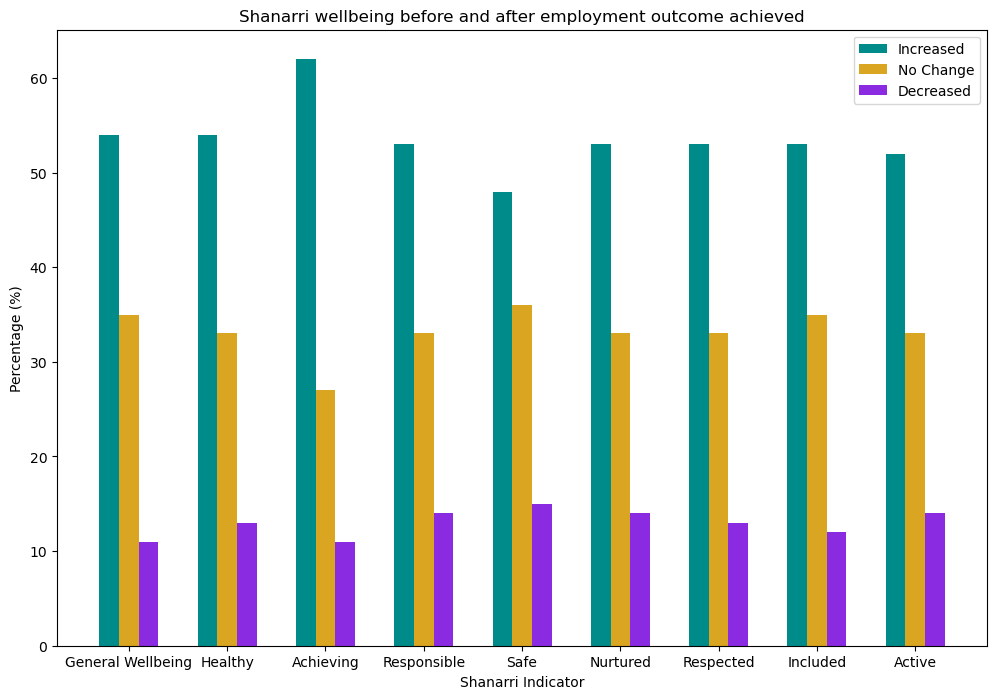

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = [
    'General Wellbeing', 'Healthy', 'Achieving', 'Responsible', 'Safe',
    'Nurtured', 'Respected', 'Included', 'Active'
]

increased = [54, 54, 62, 53, 48, 53, 53, 53, 52]
no_change = [35, 33, 27, 33, 36, 33, 33, 35, 33]
decreased = [11, 13, 11, 14, 15, 14, 13, 12, 14]

bar_width = 0.2
index = np.arange(len(categories))

# Create a larger figure
plt.figure(figsize=(12, 8))

# Plotting
plt.bar(index - bar_width, increased, bar_width, label='Increased', color='darkcyan')
plt.bar(index, no_change, bar_width, label='No Change', color='goldenrod')
plt.bar(index + bar_width, decreased, bar_width, label='Decreased', color='blueviolet')

# Customize the plot
plt.xlabel('Shanarri Indicator')
plt.ylabel('Percentage (%)')
plt.title('Shanarri wellbeing before and after employment outcome achieved')
plt.xticks(index, categories)
plt.legend()

# Show the plot
plt.show()


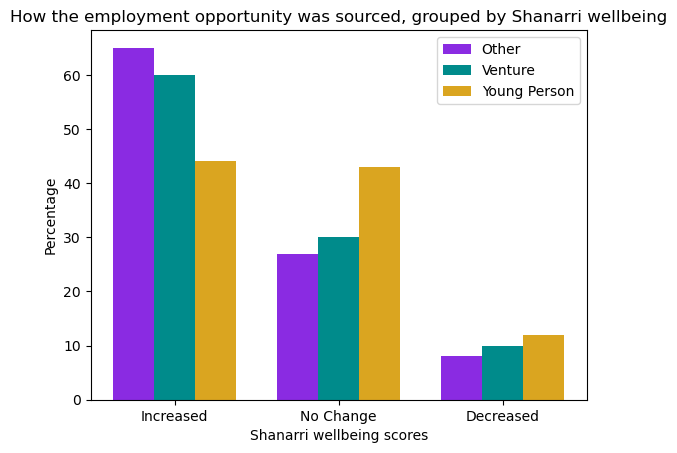

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Increased', 'No Change', 'Decreased']
venture_values = [60, 30, 10]
young_person_values = [44, 43, 12]
other_values = [65, 27, 8]

bar_width = 0.25
index = np.arange(len(categories))

# Creating bar plots
plt.bar(index, other_values, width=bar_width, label='Other', color='blueviolet')
plt.bar(index + bar_width, venture_values, width=bar_width, label='Venture', color='Darkcyan')
plt.bar(index + 2*bar_width, young_person_values, width=bar_width, label='Young Person', color='goldenrod')

# Adding labels
plt.xlabel('Shanarri wellbeing scores')
plt.ylabel('Percentage')
plt.title('How the employment opportunity was sourced, grouped by Shanarri wellbeing')
plt.xticks(index + bar_width, categories)
plt.legend()

# Displaying the plot
plt.show()


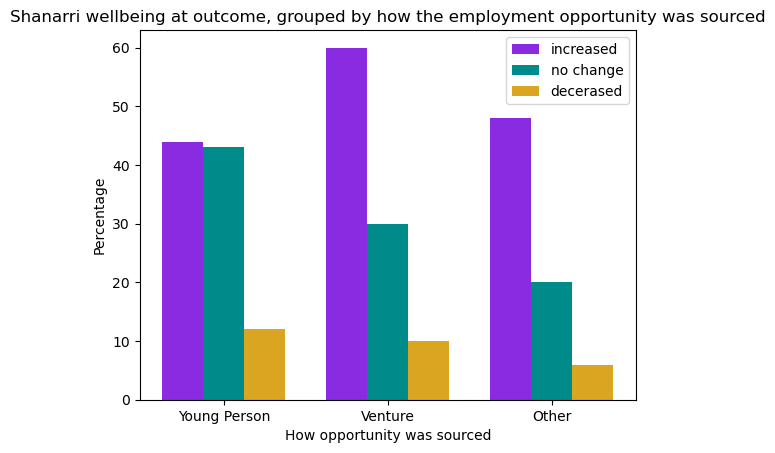

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Young Person','Venture', 'Other']
increased = [44, 60, 48]
no_change = [43, 30, 20]
decreased = [12, 10, 6]

bar_width = 0.25
index = np.arange(len(categories))

# Creating bar plots
plt.bar(index, increased, width=bar_width, label='increased', color='blueviolet')
plt.bar(index + bar_width, no_change, width=bar_width, label='no change', color='Darkcyan')
plt.bar(index + 2*bar_width, decreased, width=bar_width, label='decerased', color='goldenrod')

# Adding labels
plt.xlabel('How opportunity was sourced')
plt.ylabel('Percentage')
plt.title('Shanarri wellbeing at outcome, grouped by how the employment opportunity was sourced')
plt.xticks(index + bar_width, categories)
plt.legend()

# Displaying the plot
plt.show()

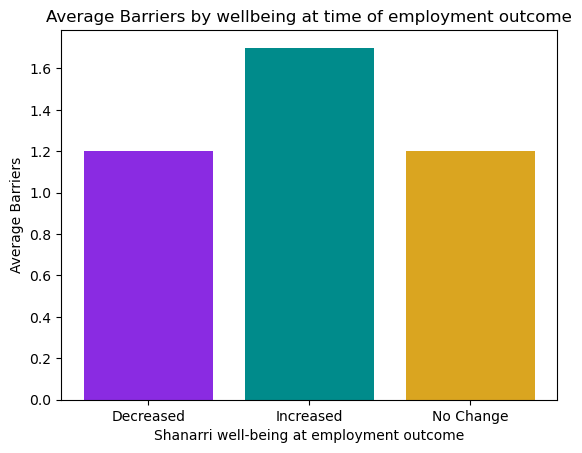

In [54]:
import matplotlib.pyplot as plt

# Data
categories = ['Decreased', 'Increased', 'No Change']
average_barriers = [1.2, 1.7, 1.2]

# Creating a bar chart
plt.bar(categories, average_barriers, color=['blueviolet', 'Darkcyan', 'goldenrod'])

# Adding labels and title
plt.xlabel('Shanarri well-being at employment outcome')
plt.ylabel('Average Barriers')
plt.title('Average Barriers by wellbeing at time of employment outcome')

# Displaying the plot
plt.show()
